In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset
df_ev_population = pd.read_csv('/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv')

# Remove rows with missing values
df_ev_population.dropna(inplace=True)




In [35]:
# Preview the dataset with the additional columns
print(df_ev_population[['Make', 'Model', 'Electric Range', 'Model Year', 'City']].head())

    Make    Model  Electric Range  Model Year       City
0  TESLA  MODEL Y             291        2020    Seattle
1  TESLA  MODEL Y               0        2023    Bothell
2  TESLA  MODEL S             270        2019    Seattle
3  TESLA  MODEL S             210        2016   Issaquah
4  TESLA  MODEL Y               0        2021  Suquamish


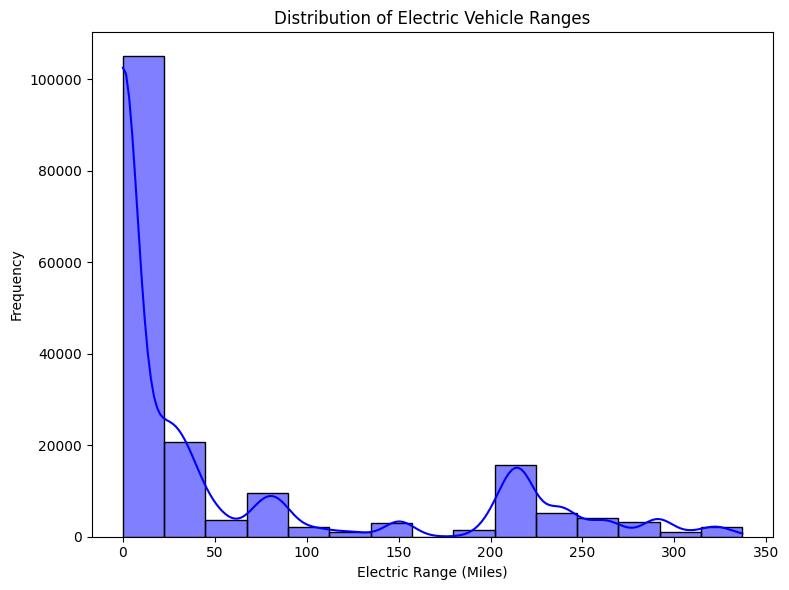

In [37]:
# Histogram of Electric Range
plt.figure(figsize=(8, 6))
sns.histplot(df_ev_population['Electric Range'], bins=15, kde=True, color='blue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("ev_range_distribution.jpg")
plt.show()

In [38]:
# Scaling the 'Electric Range' for clustering
scaler = StandardScaler()
df_ev_population['Range_Scaled'] = scaler.fit_transform(df_ev_population[['Electric Range']])

In [39]:
# Perform KMeans clustering based on the scaled electric range
kmeans = KMeans(n_clusters=3, random_state=42)
df_ev_population['Cluster'] = kmeans.fit_predict(df_ev_population[['Range_Scaled']])

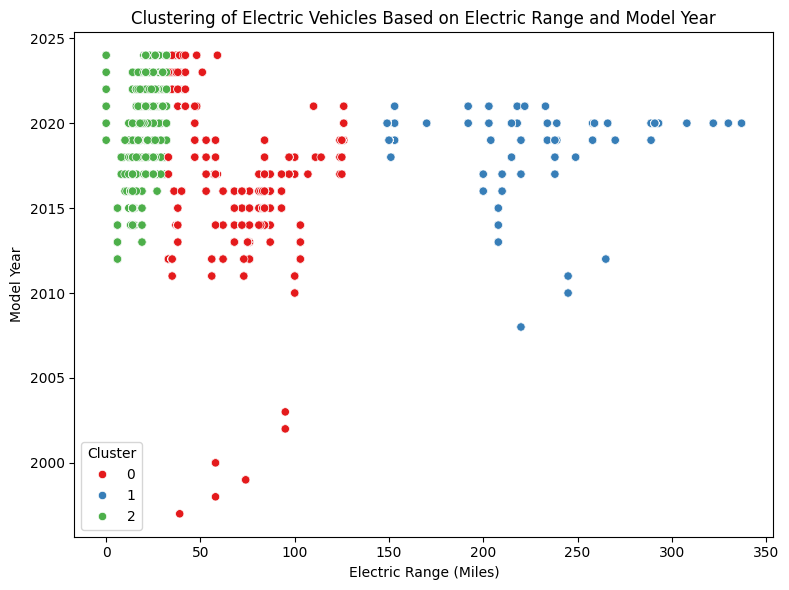

In [41]:
# Plot clusters with Electric Range vs Model Year
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Electric Range', y='Model Year', hue='Cluster', data=df_ev_population, palette='Set1')
plt.title('Clustering of Electric Vehicles Based on Electric Range and Model Year')
plt.xlabel('Electric Range (Miles)')
plt.ylabel('Model Year')
plt.tight_layout()
plt.savefig("ev_clusters.jpg")
plt.show()

In [42]:
# Summarize each cluster's average electric range
cluster_summary = df_ev_population.groupby('Cluster')['Electric Range'].mean()
print("Average Electric Range for each Cluster:\n", cluster_summary)

Average Electric Range for each Cluster:
 Cluster
0     64.500718
1    232.295706
2      4.858689
Name: Electric Range, dtype: float64


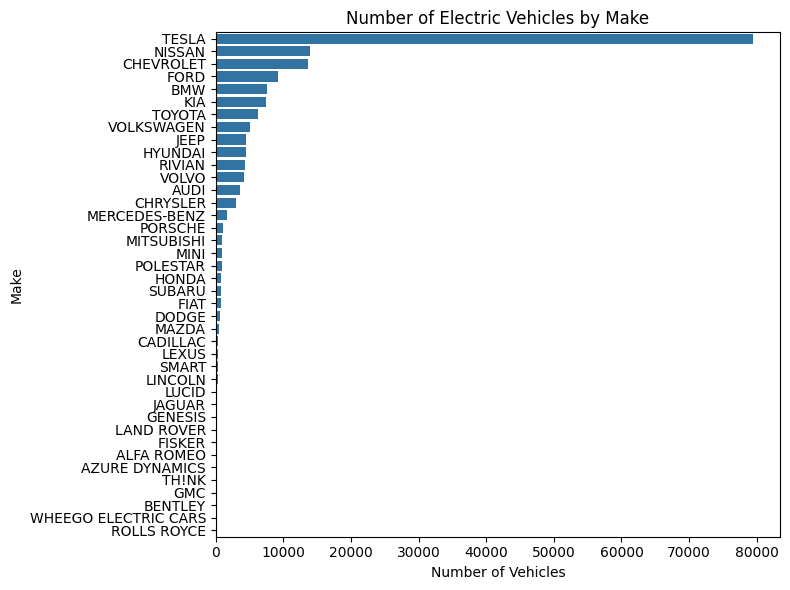

In [44]:
# Bar plot of EV Count by Make
plt.figure(figsize=(8, 6))
df_ev_make_counts = df_ev_population['Make'].value_counts()
sns.barplot(x=df_ev_make_counts.values, y=df_ev_make_counts.index)
plt.title('Number of Electric Vehicles by Make')
plt.xlabel('Number of Vehicles')
plt.ylabel('Make')
plt.tight_layout()
plt.savefig("ev_make_distribution.jpg")
plt.show()

In [45]:
# Add EV Density based on Electric Range
df_ev_population['EV_Charge_Density'] = df_ev_population['Electric Range'] / df_ev_population['Electric Range'].sum()

# Sort by density for better visualization
df_sorted_density = df_ev_population.sort_values(by='EV_Charge_Density', ascending=False)

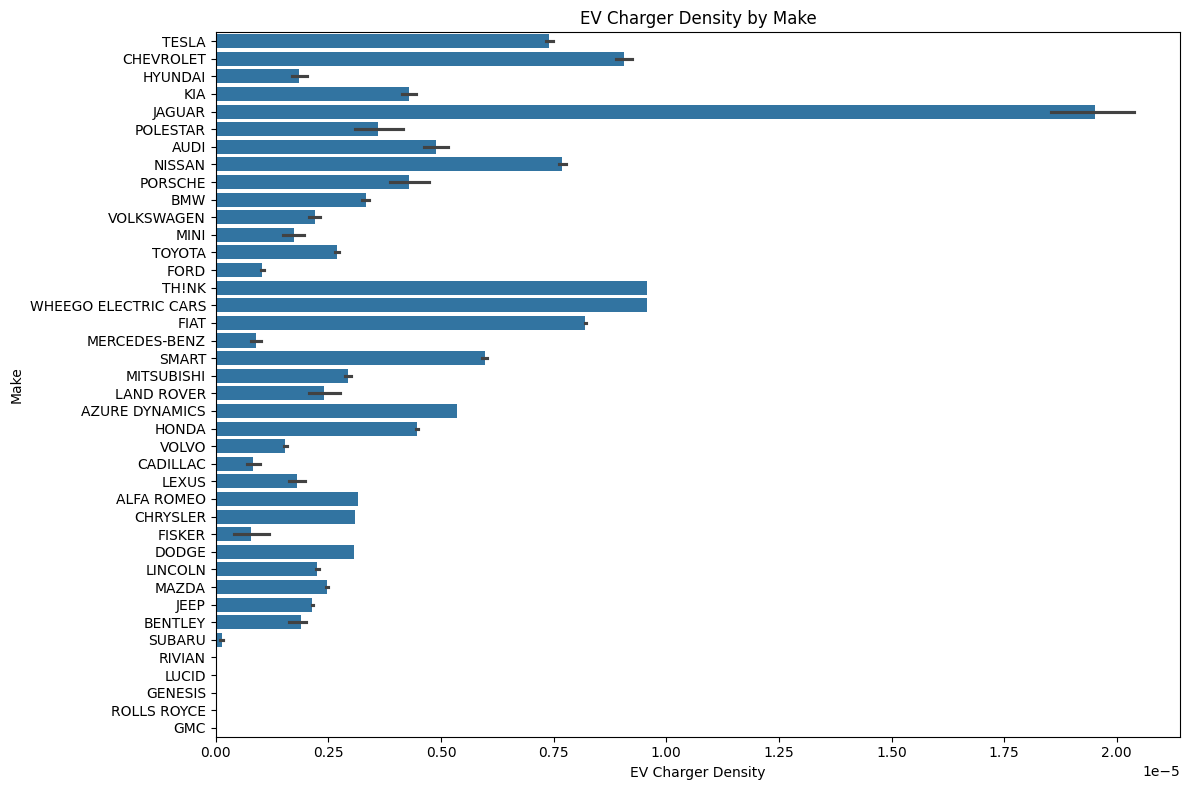

In [46]:
# Plotting the EV Charge Density by Make
plt.figure(figsize=(12, 8))
sns.barplot(x='EV_Charge_Density', y='Make', data=df_sorted_density)
plt.title('EV Charger Density by Make')
plt.xlabel('EV Charger Density')
plt.ylabel('Make')
plt.tight_layout()
plt.savefig("ev_density_by_make.jpg")
plt.show()

In [47]:
# Segmenting vehicles into categories based on Electric Range
conditions = [
    (df_ev_population['Electric Range'] > 250),
    (df_ev_population['Electric Range'] > 100) & (df_ev_population['Electric Range'] <= 250),
    (df_ev_population['Electric Range'] <= 100)
]
choices = ['High Range', 'Moderate Range', 'Low Range']
df_ev_population['Range Segment'] = np.select(conditions, choices, default='Unknown')

In [48]:
# Display the categorized vehicles along with additional features
print(df_ev_population[['Make', 'Model', 'Electric Range', 'Range Segment', 'Model Year', 'City']])

# Group by cluster and summarize
cluster_profile = df_ev_population.groupby('Cluster')['Electric Range'].describe()
print("Cluster Profiling Summary:\n", cluster_profile)

              Make          Model  Electric Range   Range Segment  Model Year  \
0            TESLA        MODEL Y             291      High Range        2020   
1            TESLA        MODEL Y               0       Low Range        2023   
2            TESLA        MODEL S             270      High Range        2019   
3            TESLA        MODEL S             210  Moderate Range        2016   
4            TESLA        MODEL Y               0       Low Range        2021   
...            ...            ...             ...             ...         ...   
177861       TESLA        MODEL Y               0       Low Range        2022   
177862     HYUNDAI  KONA ELECTRIC               0       Low Range        2023   
177863       TESLA        MODEL Y               0       Low Range        2021   
177864  VOLKSWAGEN           ID.4               0       Low Range        2021   
177865       TESLA        MODEL 3               0       Low Range        2021   

                 City  
0  

In [49]:
# Adding custom profiling logic with additional features
for i in range(3):
    cluster = df_ev_population[df_ev_population['Cluster'] == i]
    print(f"\nCluster {i} includes vehicles with the following details:")
    print(cluster[['Make', 'Model', 'City', 'Model Year', 'Electric Range']].values)


Cluster 0 includes vehicles with the following details:
[['NISSAN' 'LEAF' 'Yakima' 2013 75]
 ['NISSAN' 'LEAF' 'Port Orchard' 2015 84]
 ['BMW' 'I3' 'Bainbridge Island' 2019 126]
 ...
 ['CHEVROLET' 'VOLT' 'Richland' 2019 53]
 ['TOYOTA' 'RAV4 PRIME' 'Kent' 2022 42]
 ['NISSAN' 'LEAF' 'Shelton' 2015 84]]

Cluster 1 includes vehicles with the following details:
[['TESLA' 'MODEL Y' 'Seattle' 2020 291]
 ['TESLA' 'MODEL S' 'Seattle' 2019 270]
 ['TESLA' 'MODEL S' 'Issaquah' 2016 210]
 ...
 ['TESLA' 'MODEL 3' 'Issaquah' 2019 220]
 ['TESLA' 'MODEL 3' 'Mead' 2018 215]
 ['CHEVROLET' 'BOLT EV' 'Sequim' 2018 238]]

Cluster 2 includes vehicles with the following details:
[['TESLA' 'MODEL Y' 'Bothell' 2023 0]
 ['TESLA' 'MODEL Y' 'Suquamish' 2021 0]
 ['FORD' 'FUSION' 'Yelm' 2017 21]
 ...
 ['TESLA' 'MODEL Y' 'Quincy' 2021 0]
 ['VOLKSWAGEN' 'ID.4' 'Black Diamond' 2021 0]
 ['TESLA' 'MODEL 3' 'Tacoma' 2021 0]]


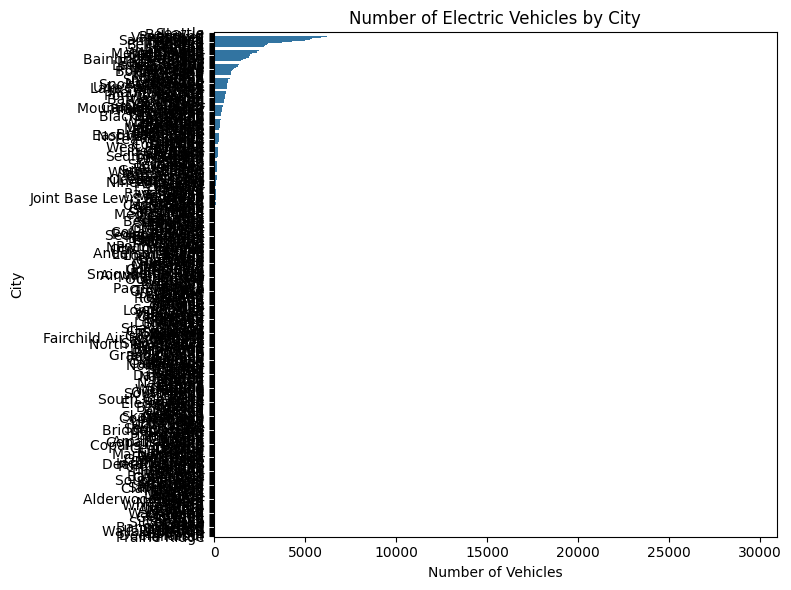

In [51]:
# Plot EV distribution by City
plt.figure(figsize=(8, 6))
df_ev_city_counts = df_ev_population['City'].value_counts()
sns.barplot(x=df_ev_city_counts.values, y=df_ev_city_counts.index)
plt.title('Number of Electric Vehicles by City')
plt.xlabel('Number of Vehicles')
plt.ylabel('City')
plt.tight_layout()
plt.savefig("ev_city_distribution.jpg")
plt.show()

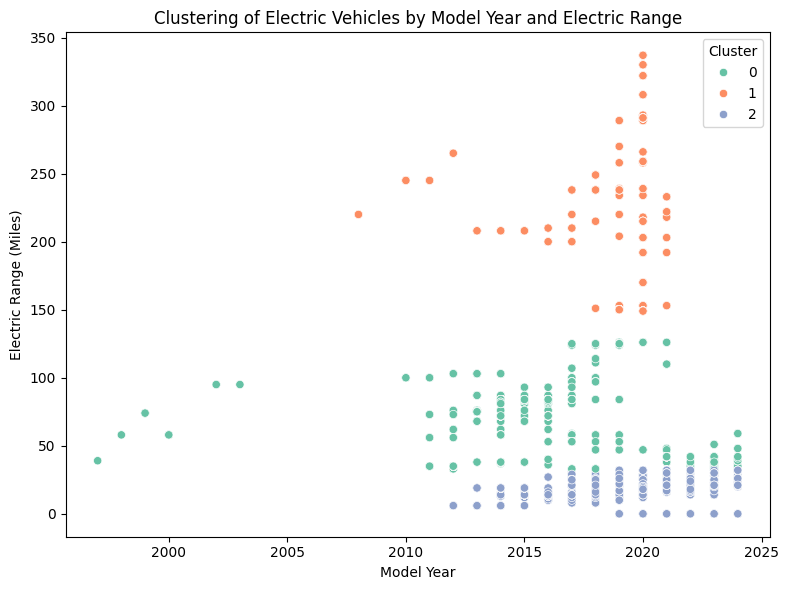

In [53]:
# Scatter plot showing clustering by City and Model Year
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Model Year', y='Electric Range', hue='Cluster', data=df_ev_population, palette='Set2')
plt.title('Clustering of Electric Vehicles by Model Year and Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Electric Range (Miles)')
plt.tight_layout()
plt.savefig("ev_cluster_model_year.jpg")
plt.show()